# Regresja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

Rozważmy zbiór Boston

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

In [3]:
# get the data
boston_X = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
boston_Y = boston.values[1::2, 2]

In [4]:
X=boston_X
y=boston_Y

# Zadanie
Znajdż najleprzy model za pomocą podwujną cross-validation (nested cross-validation, double cross-validation) .


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

seed=123
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)
kfold1 = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)

In [6]:
grid_1 = GridSearchCV(estimator=make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1, tol=0.1)),
                      param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                      'elasticnet__alpha': [1., 2., 3.]},
                      scoring='r2',
                      cv=kfold, 
                      n_jobs=-1)
scores_1 = cross_val_score(grid_1, X, y, scoring='r2', cv=5)
print('CV ElasticNet R2: %.3f +/- %.3f' % (np.mean(scores_1), np.std(scores_1)))

CV ElasticNet R2: -0.297 +/- 1.530


In [7]:
grid_2 = GridSearchCV(estimator=make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1, tol=0.1)),
                      param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                      'lasso__alpha': [1., 2., 3.]},
                      scoring='r2',
                      cv=kfold,
                      n_jobs=-1)
scores_2 = cross_val_score(grid_2, X, y, scoring='r2', cv=5)
print('CV Lasso R2: %.3f +/- %.3f' % (np.mean(scores_2), np.std(scores_2)))

CV Lasso R2: 0.340 +/- 0.452


In [8]:
grid_3 = GridSearchCV(estimator=make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1, tol=0.1)),
                      param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                      'ridge__alpha': [1., 2., 3.]},
                      scoring='r2',
                      cv=kfold,
                      n_jobs=-1)
scores_3 = cross_val_score(grid_3, X, y, scoring='r2', cv=5)
print('CV Ridge R2: %.3f +/- %.3f' % (np.mean(scores_3), np.std(scores_3)))

CV Ridge R2: 0.204 +/- 0.208


In [9]:
grid_4 = GridSearchCV(estimator=linear_model.LinearRegression(),
                      param_grid={'normalize': [True, False]},
                      scoring='r2',
                      cv=kfold1,
                      n_jobs=-1)
scores_4 = cross_val_score(grid_4, X, y, scoring='r2', cv=5)
print('CV LR R2: %.3f +/- %.3f' % (np.mean(scores_4), np.std(scores_4)))

CV LR R2: 0.353 +/- 0.377


# Zad
Zwizualizuj wyniki.

([<matplotlib.axis.XTick at 0x1696b86e790>,
 <a list of 4 Text xticklabel objects>)

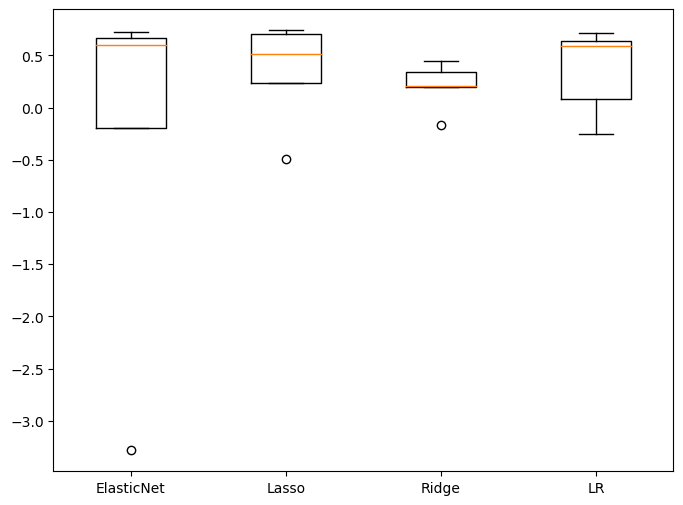

In [20]:
names = []
means = []
stds = []

for name, score in zip(['ElasticNet', 'Lasso', 'Ridge', 'LR'], [scores_1, scores_2, scores_3, scores_4]):
    means.append(np.mean(score))
    stds.append(np.std(score))
    names.append(name)

plt.figure(figsize=(8, 6))
plt.boxplot([scores_1, scores_2, scores_3, scores_4])
plt.xticks([1, 2, 3, 4], ['ElasticNet', 'Lasso', 'Ridge', 'LR'])